In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [247]:
# Step 1: Load and Prepare Data
df1 = pd.read_csv("RS_Session_263_AU_102_A.csv")

In [248]:
df1

Category    2022    2023
0           2 Wheelers  631464  859376
1           3 Wheelers  352710  582793
2  Commercial Vehicles    2649    5673
3   Passenger Vehicles   38240   82105

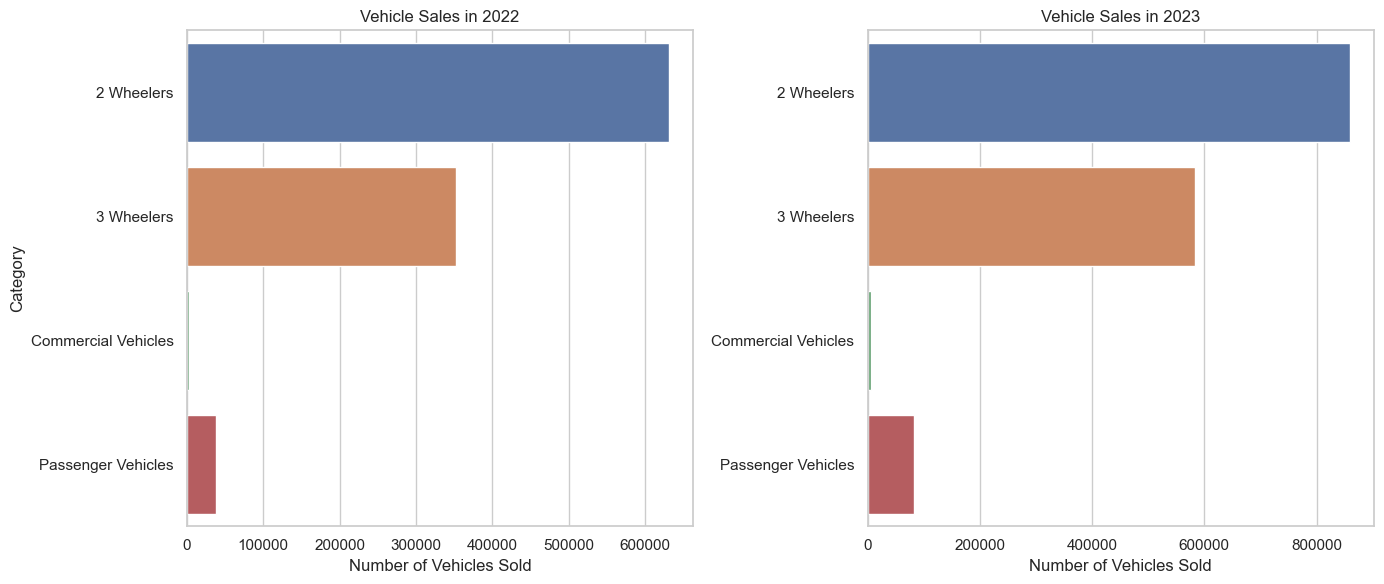

In [249]:
# Step 3: Visualization
# Create bar plots to visualize sales distribution across categories for each year
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for 2022
sns.barplot(x='2022', y='Category', data=df1, ax=axes[0])
axes[0].set_title('Vehicle Sales in 2022')
axes[0].set_xlabel('Number of Vehicles Sold')
axes[0].set_ylabel('Category')

# Bar plot for 2023
sns.barplot(x='2023', y='Category', data=df1, ax=axes[1])
axes[1].set_title('Vehicle Sales in 2023')
axes[1].set_xlabel('Number of Vehicles Sold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

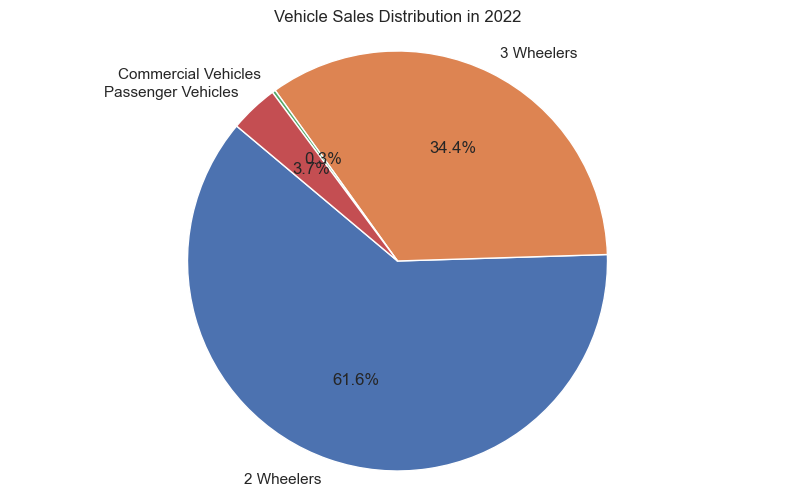

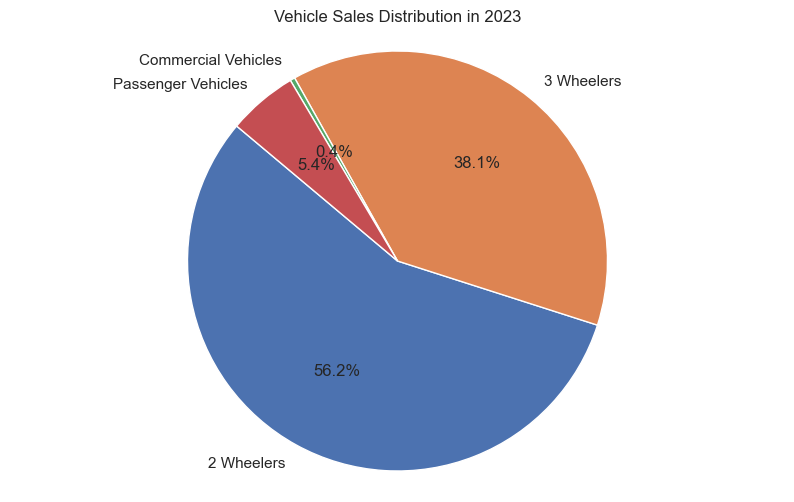

In [250]:
# Data
categories = ['2 Wheelers', '3 Wheelers', 'Commercial Vehicles', 'Passenger Vehicles']
sales_2022 = [631464, 352710, 2649, 38240]
sales_2023 = [859376, 582793, 5673, 82105]

# Pie chart for 2022
plt.figure(figsize=(10, 6))
plt.pie(sales_2022, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Sales Distribution in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for 2023
plt.figure(figsize=(10, 6))
plt.pie(sales_2023, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Sales Distribution in 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


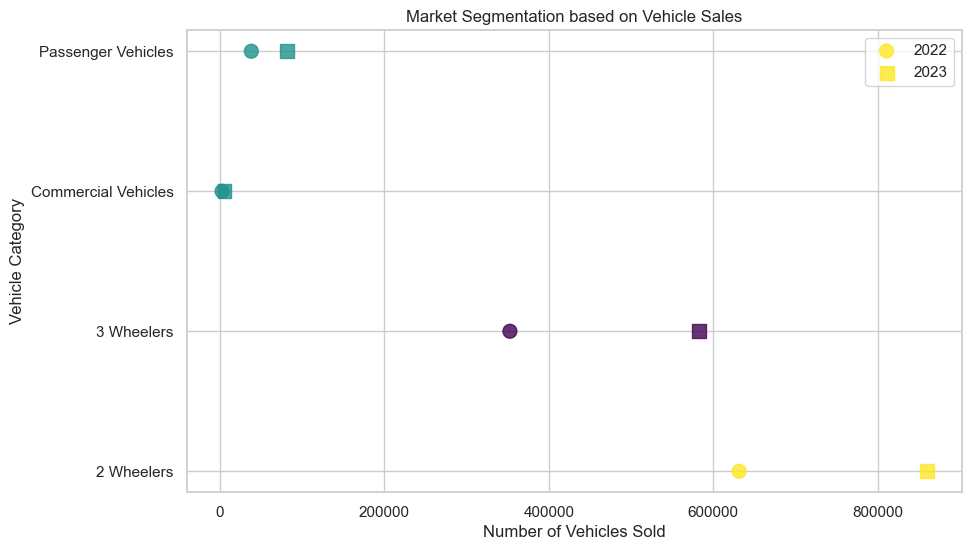

In [251]:
# Remove 'Category' column for clustering
df1_cluster = df1.drop('Category', axis=1)

# Step 2: Feature Scaling (if needed)
# Standardize the features before applying clustering
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_cluster)

# Step 3: Apply K-means Clustering
# Assume we want to find 3 clusters based on the sales data
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(df1_scaled)

# Step 4: Visualization of Clusters
plt.figure(figsize=(10, 6))

# Scatter plot for 2022 sales
plt.scatter(df1['2022'], df1['Category'], c=df1['Cluster'], cmap='viridis', s=100, alpha=0.8, label='2022')

# Scatter plot for 2023 sales
plt.scatter(df1['2023'], df1['Category'], c=df1['Cluster'], cmap='viridis', s=100, marker='s', alpha=0.8, label='2023')

plt.xlabel('Number of Vehicles Sold')
plt.ylabel('Vehicle Category')
plt.title('Market Segmentation based on Vehicle Sales')
plt.legend()
plt.show()

In [252]:
df2 = pd.read_csv("Ev_data1.csv")

In [253]:
df2.head()

type financial_year month  num_vehicles
0  E-2 Wheelers        2017-18   Apr            96
1  E-2 Wheelers        2017-18   May            91
2  E-2 Wheelers        2017-18   Jun           137
3  E-2 Wheelers        2017-18   Jul           116
4  E-2 Wheelers        2017-18   Aug            99

In [254]:
# Standardize the 'num_vehicles' column using StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2[['num_vehicles']])

In [255]:
# Step 4: Apply K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [256]:
# Step 5: Visualization of Clusters
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


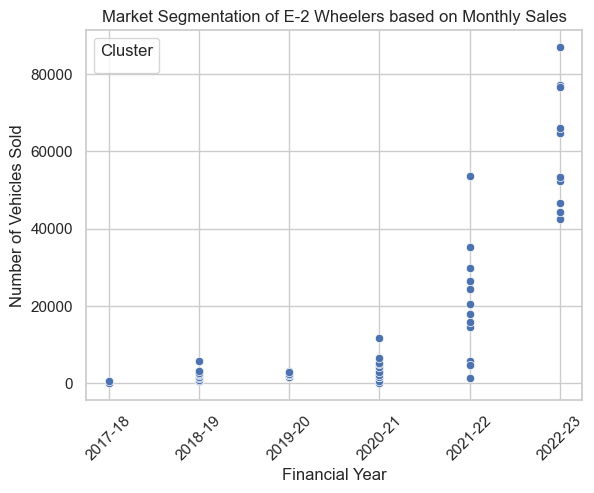

In [257]:
# Scatter plot for each cluster
sns.scatterplot(data=df2, x='financial_year', y='num_vehicles')
plt.title('Market Segmentation of E-2 Wheelers based on Monthly Sales')
plt.xlabel('Financial Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


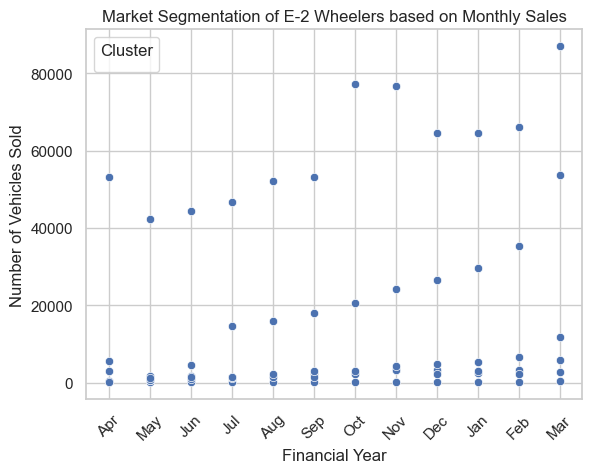

In [258]:
# Scatter plot for each cluster
sns.scatterplot(data=df2, x='month', y='num_vehicles')
plt.title('Market Segmentation of E-2 Wheelers based on Monthly Sales')
plt.xlabel('Financial Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

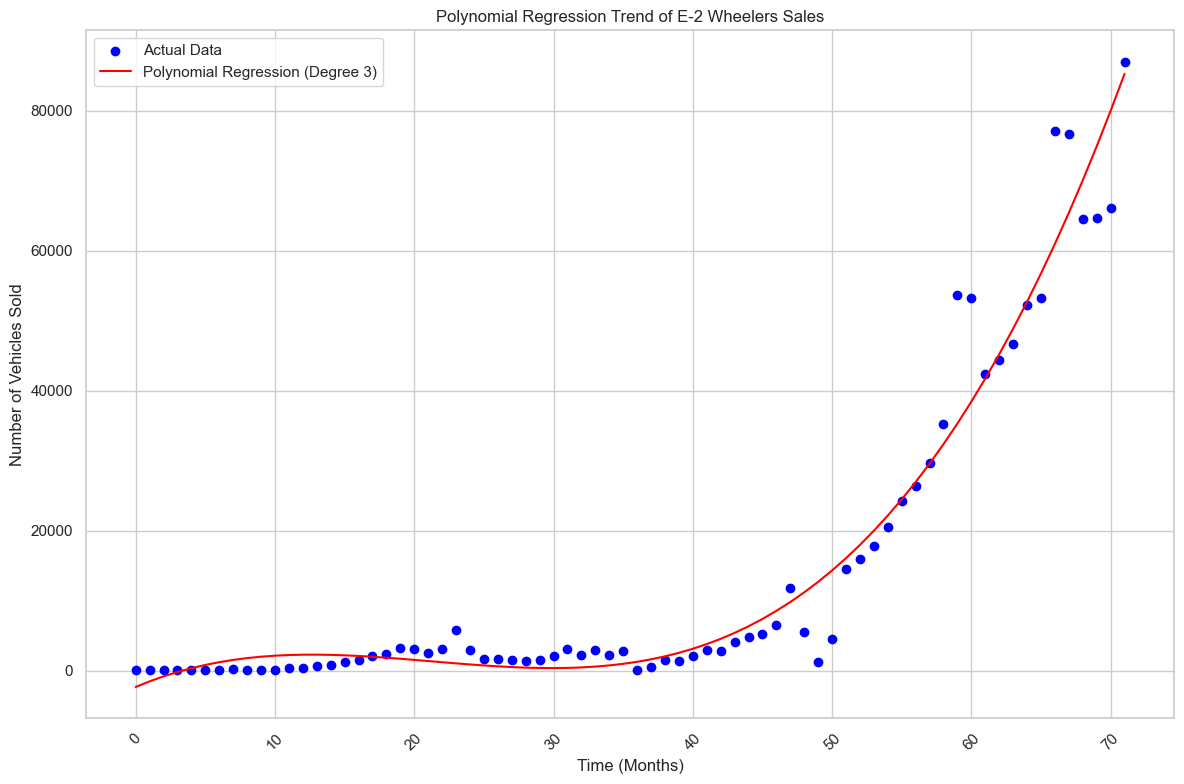

In [259]:
# Fit polynomial regression
degree = 3  # Degree of polynomial
x = np.arange(len(df2))  # Assuming x-axis as index or time
y = df2['num_vehicles'].values

coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Step 2: Visualization of Polynomial Regression
plt.figure(figsize=(12, 8))

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, polynomial(x), color='red', label='Polynomial Regression (Degree 3)')

plt.title('Polynomial Regression Trend of E-2 Wheelers Sales')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Vehicles Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


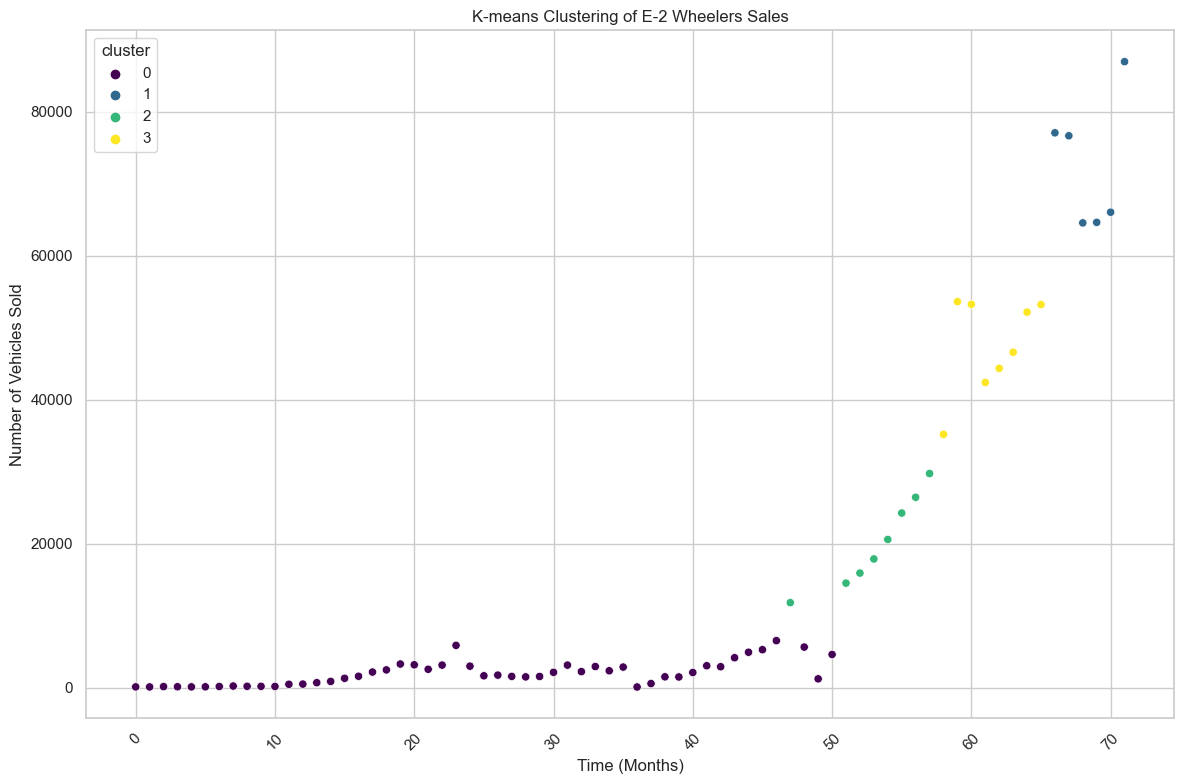

In [260]:
# Prepare data for clustering
# Extract relevant numerical features (assuming only 'num_vehicles' for now)
X = df2[['num_vehicles']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters
df2['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x=df2.index, y='num_vehicles', hue='cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of E-2 Wheelers Sales')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [261]:
df3 = pd.read_csv("RS_Session_256_AU_95_C.csv")

In [262]:
df3.head()

State Name  Two Wheeler  Three Wheeler  Four Wheeler  \
0  Andaman and Nicobar Island            1           30.0            81   
1           Arunachal Pradesh           14            NaN             5   
2                       Assam          721        47041.0           161   
3                       Bihar         5003        59079.0           114   
4                  Chandigarh          298         1410.0           182   

   Goods Vehicles  Public Service Vehicle  Special Category Vehicles  \
0             NaN                    40.0                        NaN   
1             NaN                     NaN                        NaN   
2             7.0                    15.0                        NaN   
3            11.0                    26.0                        NaN   
4             NaN                    40.0                        NaN   

   Ambulance/Hearses  Construction Equipment Vehicle  Other  Grand Total  
0                NaN                             NaN    7.0          159  
1                NaN                             NaN    1.0           20  
2                NaN                             NaN    2.0        47947  
3                NaN                             NaN    8.0        64241  
4                NaN                             NaN    1.0         1931

In [263]:
# Sort the data by 'Two Wheeler' values for better visualization
df3.sort_values(by='Two Wheeler', ascending=False, inplace=True)

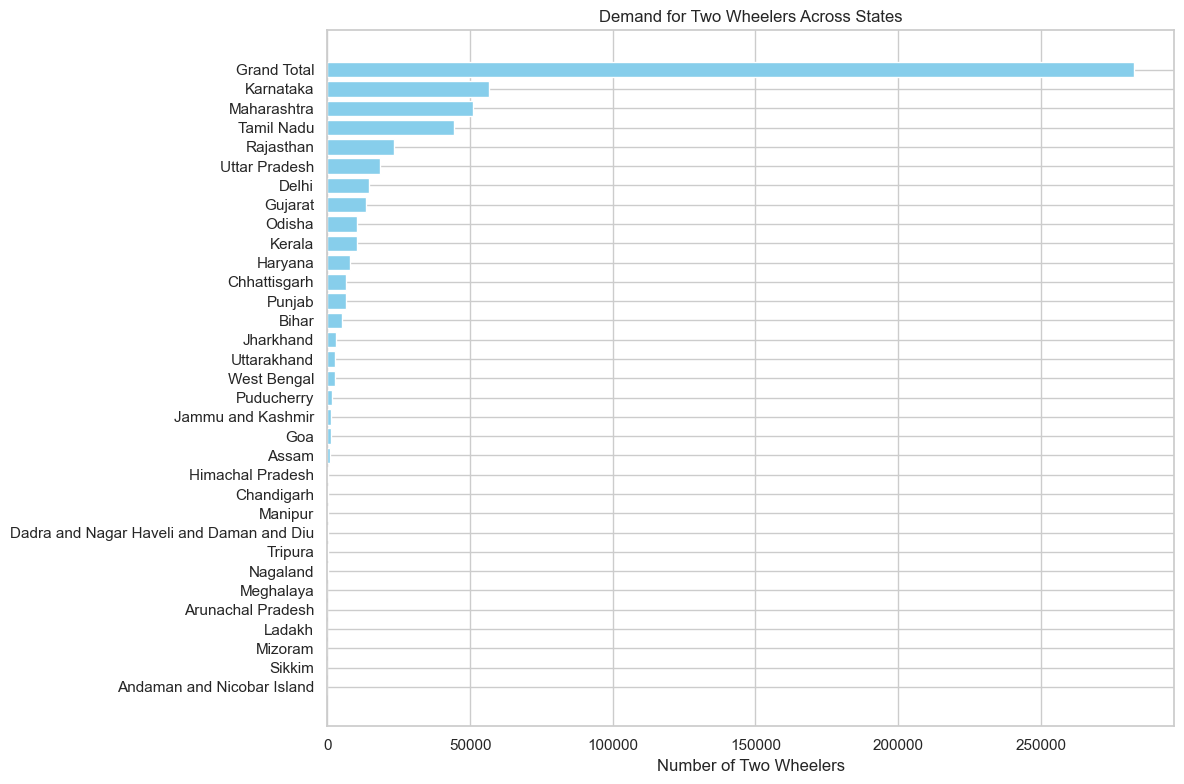

In [264]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df3['State Name'], df3['Two Wheeler'], color='skyblue')
plt.xlabel('Number of Two Wheelers')
plt.title('Demand for Two Wheelers Across States')
plt.gca().invert_yaxis()  # Invert y-axis to display highest demand at the top
plt.tight_layout()
plt.show()

In [265]:
# Sort the data by 'Three Wheeler' values for better visualization
df3.sort_values(by='Three Wheeler', ascending=False, inplace=True)

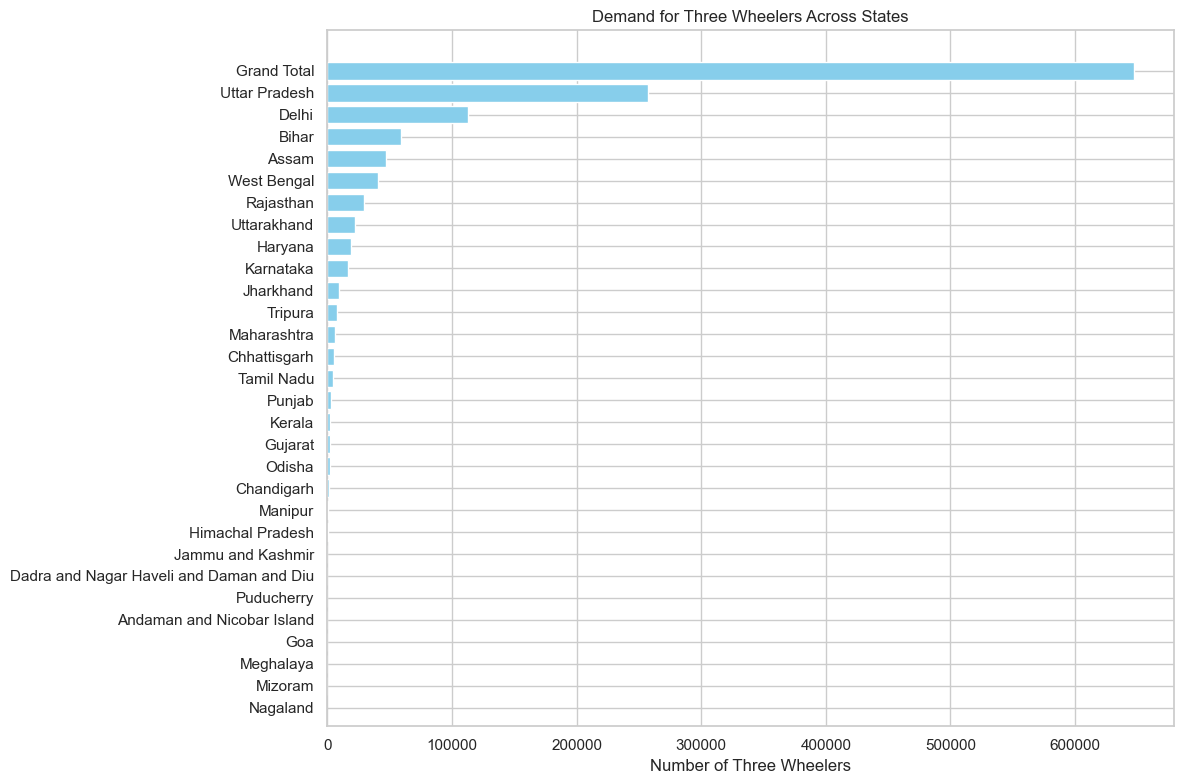

In [266]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df3['State Name'], df3['Three Wheeler'], color='skyblue')
plt.xlabel('Number of Three Wheelers')
plt.title('Demand for Three Wheelers Across States')
plt.gca().invert_yaxis()  # Invert y-axis to display highest demand at the top
plt.tight_layout()
plt.show()

In [267]:
# Sort the data by 'Four Wheeler' values for better visualization
df3.sort_values(by='Four Wheeler', ascending=False, inplace=True)

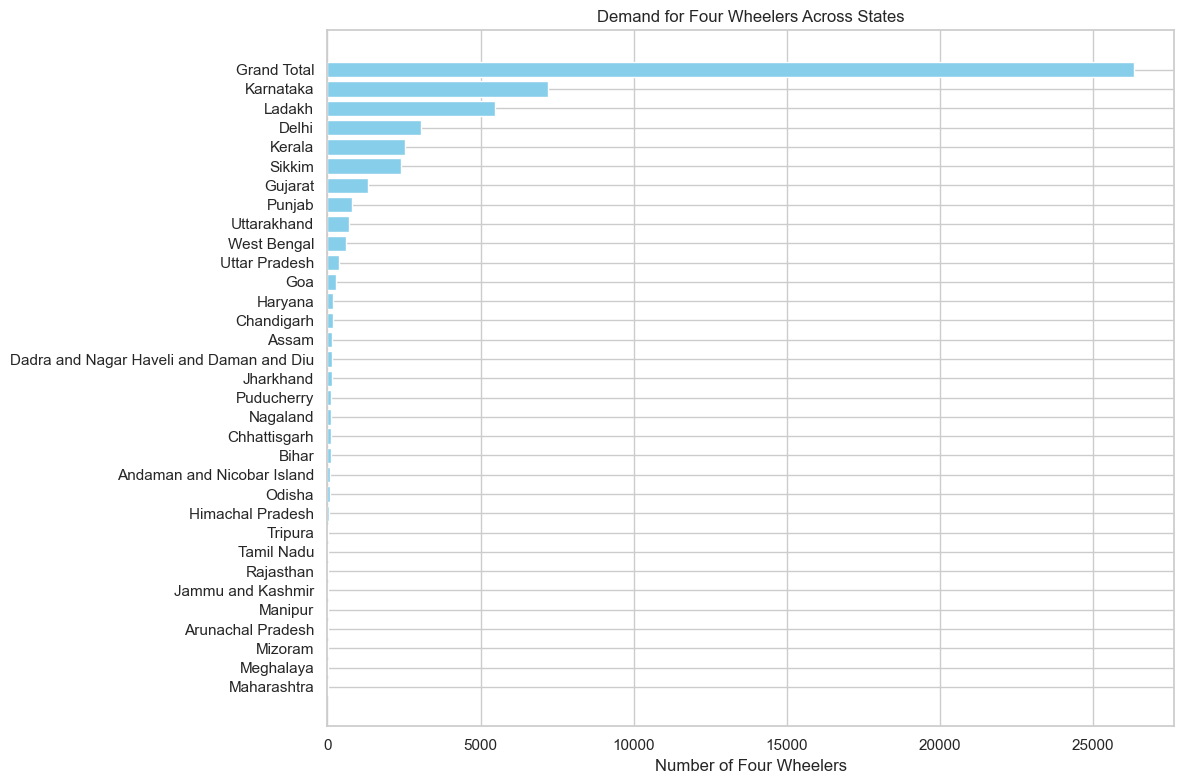

In [268]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df3['State Name'], df3['Four Wheeler'], color='skyblue')
plt.xlabel('Number of Four Wheelers')
plt.title('Demand for Four Wheelers Across States')
plt.gca().invert_yaxis()  # Invert y-axis to display highest demand at the top
plt.tight_layout()
plt.show()

In [269]:
df4 = pd.read_csv("EV_industry.csv")

In [270]:
df4.head()

category financial_year  num_vehicles
0  E-2 Wheelers        2017-18          1981
1  E-2 Wheelers        2018-19         27478
2  E-2 Wheelers        2019-20         26512
3  E-2 Wheelers        2020-21         44294
4  E-2 Wheelers        2021-22        249615

In [271]:
# Convert 'financial_year' to numeric values for easier manipulation
df4['year'] = pd.to_numeric(df4['financial_year'].str.split('-').str[0])

In [272]:
# Separate data for each category
e2_data = df4[df4['category'] == 'E-2 Wheelers']
e3_data = df4[df4['category'] == 'E-3 Wheelers']
e4_data = df4[df4['category'] == 'E-4 Wheelers']
ebus_data = df4[df4['category'] == 'E-Buses']

In [273]:
def polynomial_regression(x, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_poly, y)
    
    return model.coef_


In [274]:
# Perform polynomial regression and calculate slopes (coefficients) for each category
degree = 2  # Degree of polynomial (quadratic)
e2_slope = polynomial_regression(e2_data['year'], e2_data['num_vehicles'], degree)[2]
e3_slope = polynomial_regression(e3_data['year'], e3_data['num_vehicles'], degree)[2]
e4_slope = polynomial_regression(e4_data['year'], e4_data['num_vehicles'], degree)[2]
ebus_slope = polynomial_regression(ebus_data['year'], ebus_data['num_vehicles'], degree)[2]


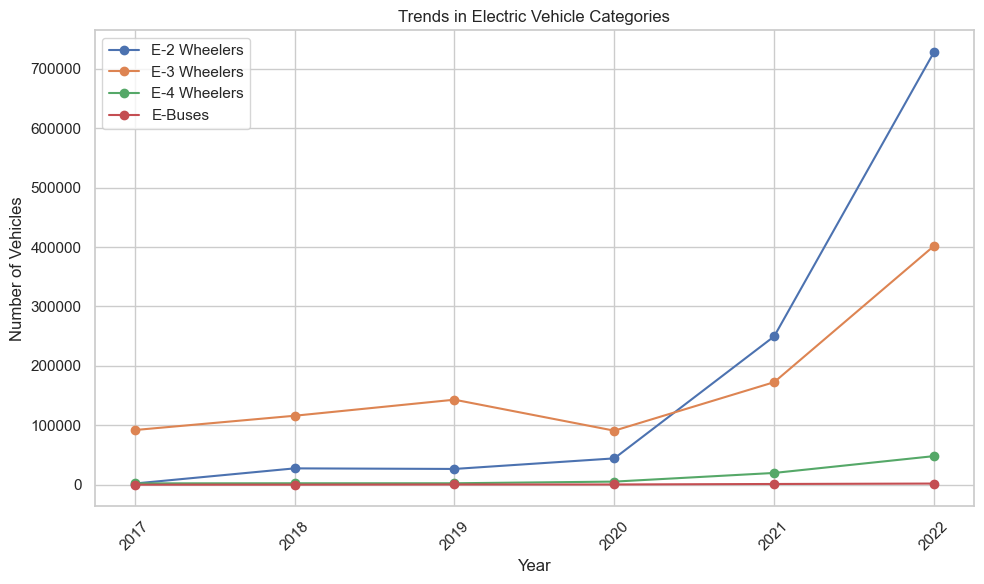

Slopes (Coefficient of x^2) for each category:
E-2 Wheelers: 55179.25
E-3 Wheelers: 22230.18
E-4 Wheelers: 3555.82
E-Buses: 98.55


In [275]:
# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(e2_data['year'], e2_data['num_vehicles'], marker='o', label='E-2 Wheelers')
plt.plot(e3_data['year'], e3_data['num_vehicles'], marker='o', label='E-3 Wheelers')
plt.plot(e4_data['year'], e4_data['num_vehicles'], marker='o', label='E-4 Wheelers')
plt.plot(ebus_data['year'], ebus_data['num_vehicles'], marker='o', label='E-Buses')

plt.title('Trends in Electric Vehicle Categories')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the slopes
print(f"Slopes (Coefficient of x^2) for each category:")
print(f"E-2 Wheelers: {e2_slope:.2f}")
print(f"E-3 Wheelers: {e3_slope:.2f}")
print(f"E-4 Wheelers: {e4_slope:.2f}")
print(f"E-Buses: {ebus_slope:.2f}")

In [276]:
df5 = pd.read_csv("bike_dataset.csv")

In [277]:
df5.head()

model_name   price  mileage   type_of_bike  weight_in_kg  \
0  Gravton Motors Quanta   99000    320.0  Electric Bike           100   
1      Simple Energy One  109999    236.0  Electric Bike           110   
2          Okaya Classiq   69900    200.0  Electric Bike            95   
3     Oben Electric Rorr  102999    200.0  Electric Bike           120   
4        Ola Electric S1   85099    181.0  Electric Bike           121   

   acceleration_speed  top_speed  
0                 4.2       70.0  
1                 3.6      100.0  
2                 NaN       25.0  
3                 3.0      100.0  
4                 2.9      116.0

C:\Users\user\AppData\Local\Temp\ipykernel_16828\4177900366.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


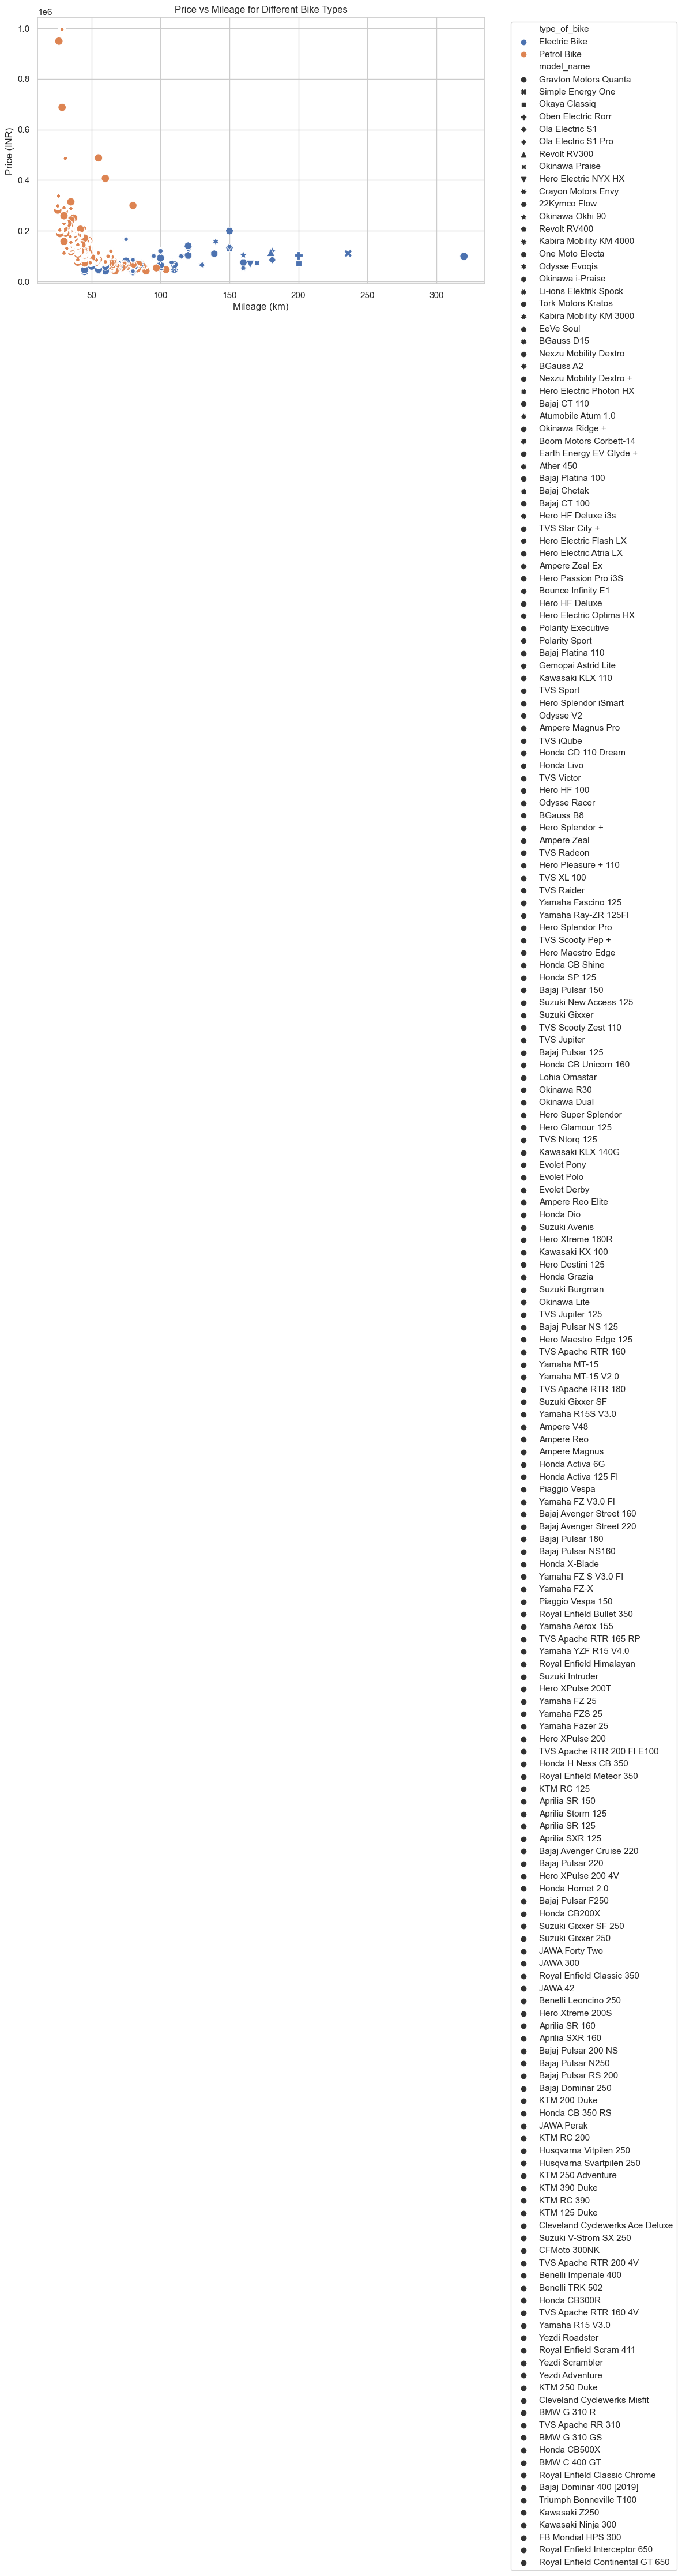

In [278]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='mileage', y='price', hue='type_of_bike', style='model_name', s=100)

# Labels and title
plt.title('Price vs Mileage for Different Bike Types')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16828\3190787227.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


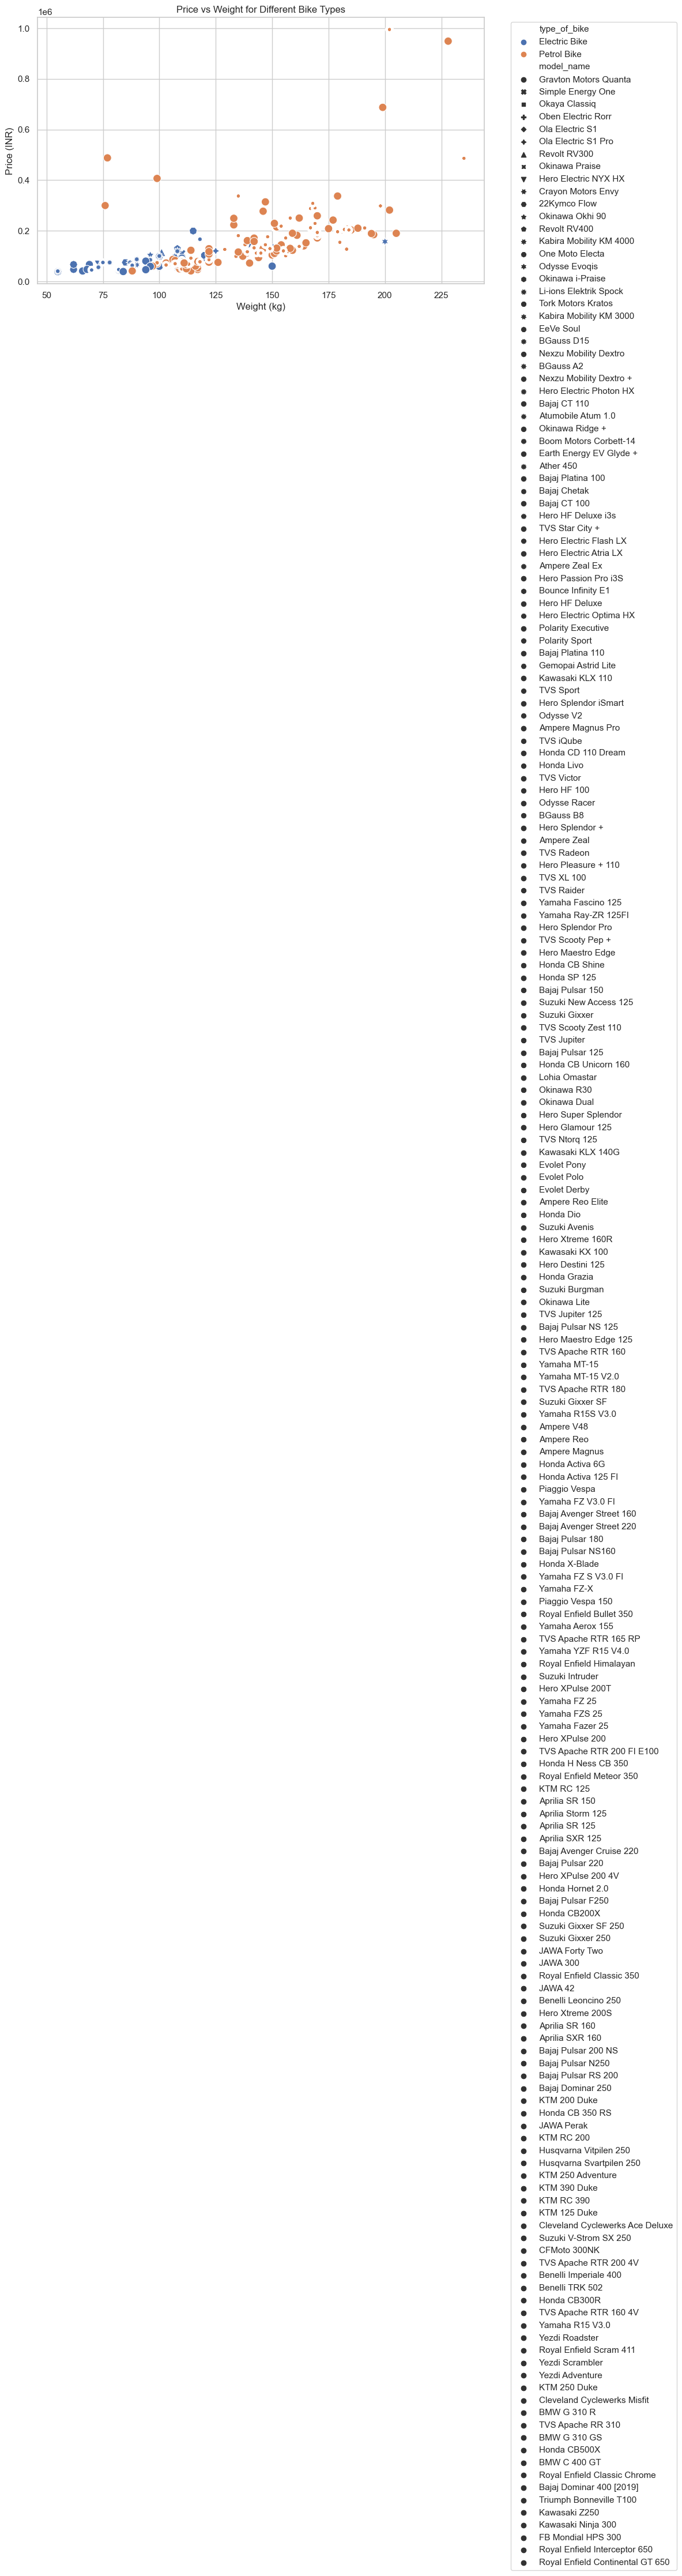

In [390]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='weight_in_kg', y='price', hue='type_of_bike', style='model_name', s=100)

# Labels and title
plt.title('Price vs Weight for Different Bike Types')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [391]:
# Filter out rows where acceleration_speed is 'N/A'
df5 = df5[df5['acceleration_speed'] != 'N/A']

# Convert acceleration_speed to numeric
df5['acceleration_speed'] = pd.to_numeric(df5['acceleration_speed'])

C:\Users\user\AppData\Local\Temp\ipykernel_16828\1924144846.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


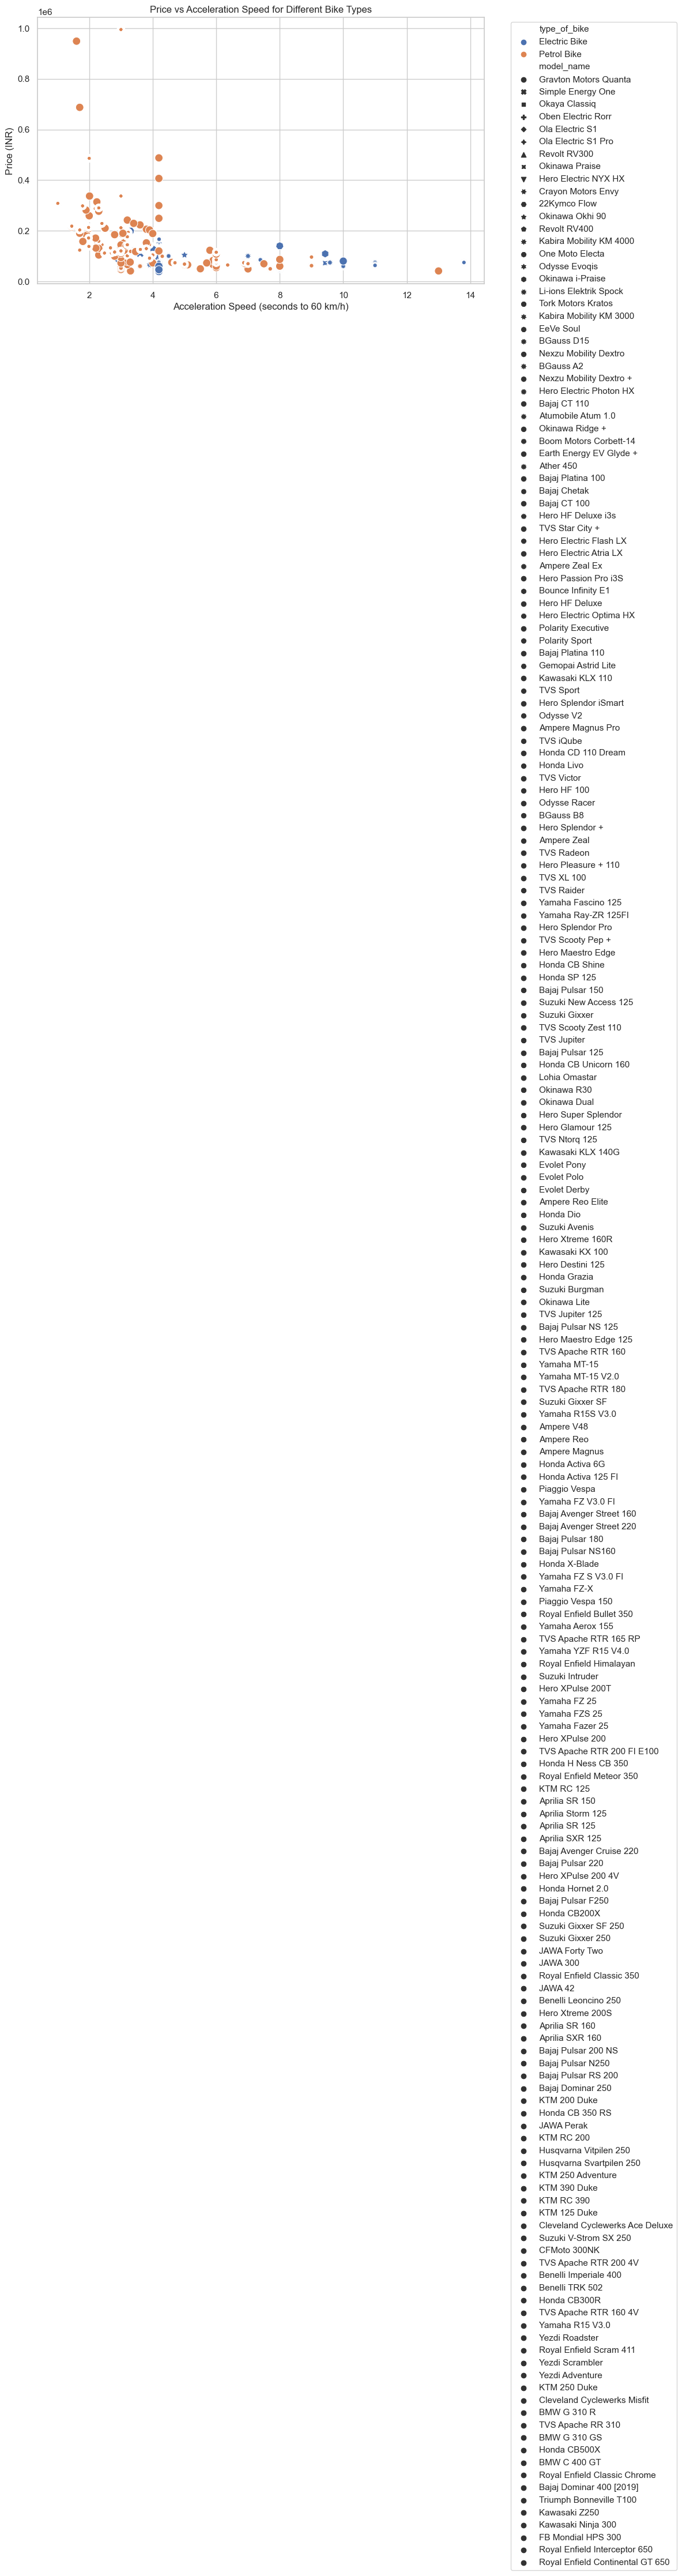

In [392]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='acceleration_speed', y='price', hue='type_of_bike', style='model_name', s=100)

# Labels and title
plt.title('Price vs Acceleration Speed for Different Bike Types')
plt.xlabel('Acceleration Speed (seconds to 60 km/h)')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [393]:
# Filter out rows where top_speed is 'N/A'
df5 = df5[df5['top_speed'] != 'N/A']

# Convert top_speed to numeric
df5['top_speed'] = pd.to_numeric(df5['top_speed'])

C:\Users\user\AppData\Local\Temp\ipykernel_16828\1183808907.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


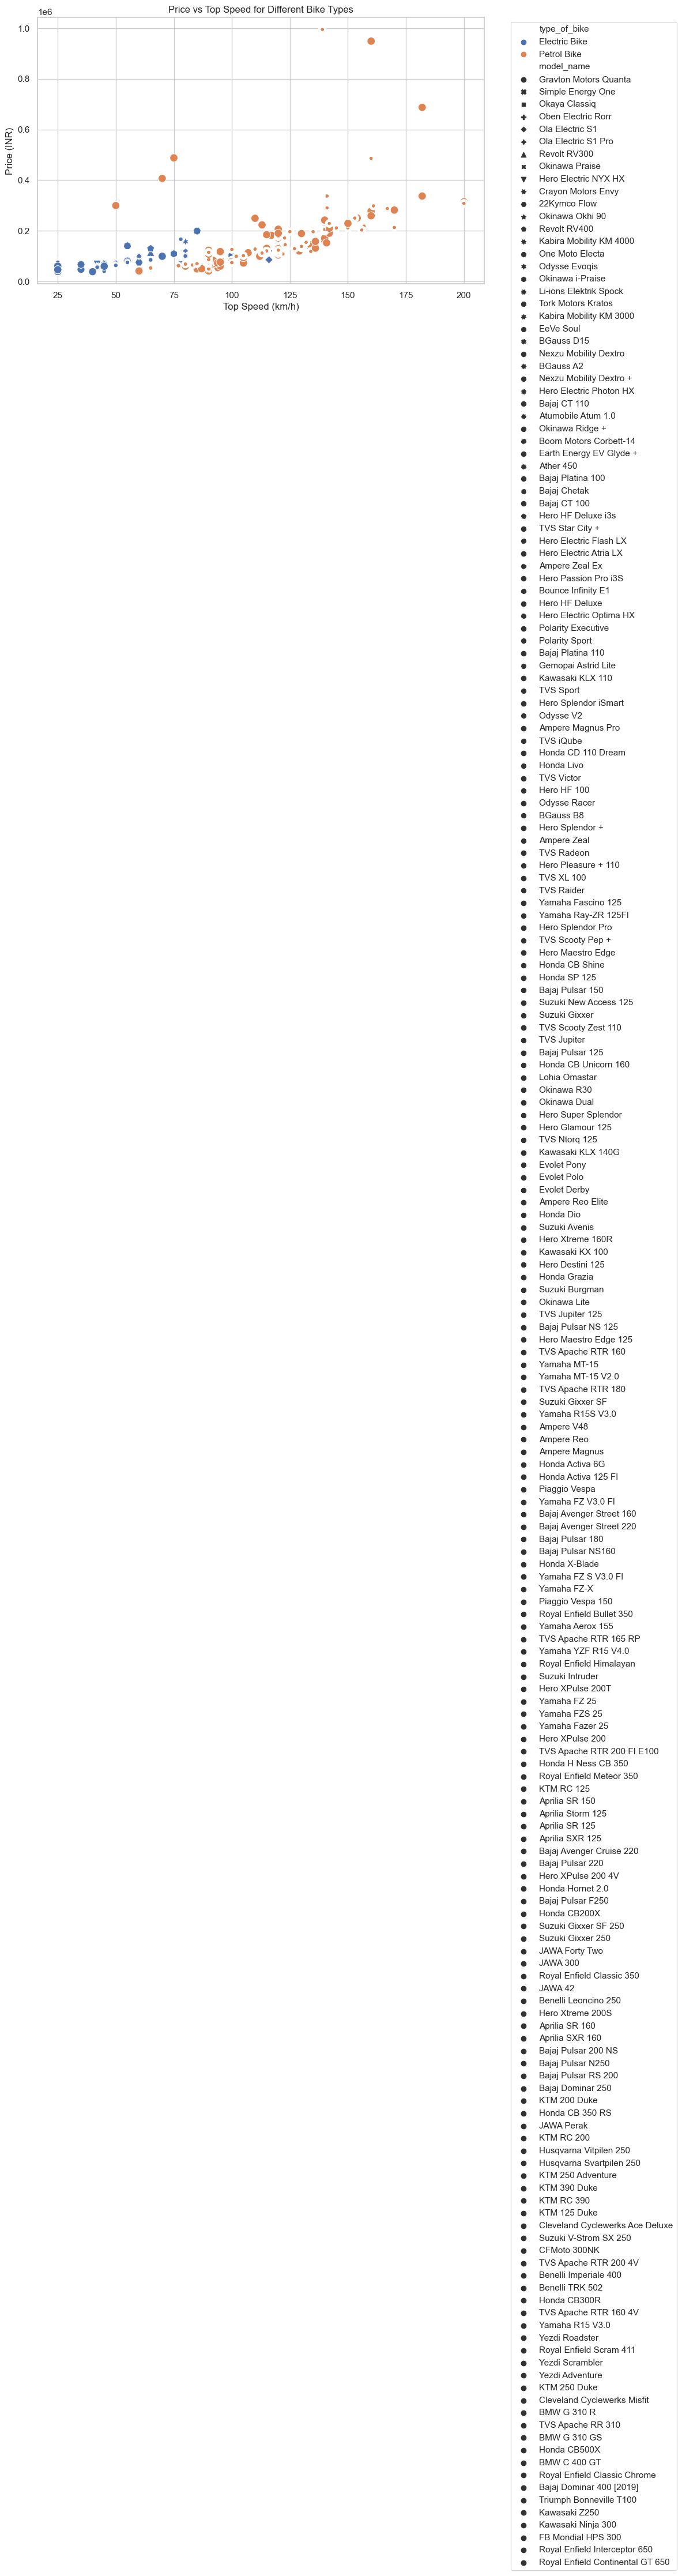

In [394]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='top_speed', y='price', hue='type_of_bike', style='model_name', s=100)

# Labels and title
plt.title('Price vs Top Speed for Different Bike Types')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [395]:
# Handle missing values
df5['acceleration_speed'] = df5['acceleration_speed'].replace('N/A', np.nan).astype(float)
df5['acceleration_speed'].fillna(df5['acceleration_speed'].mean(), inplace=True)

In [396]:
# Remove the 'model_name' column for analysis
df5_no_model = df5.drop(columns=['model_name'])

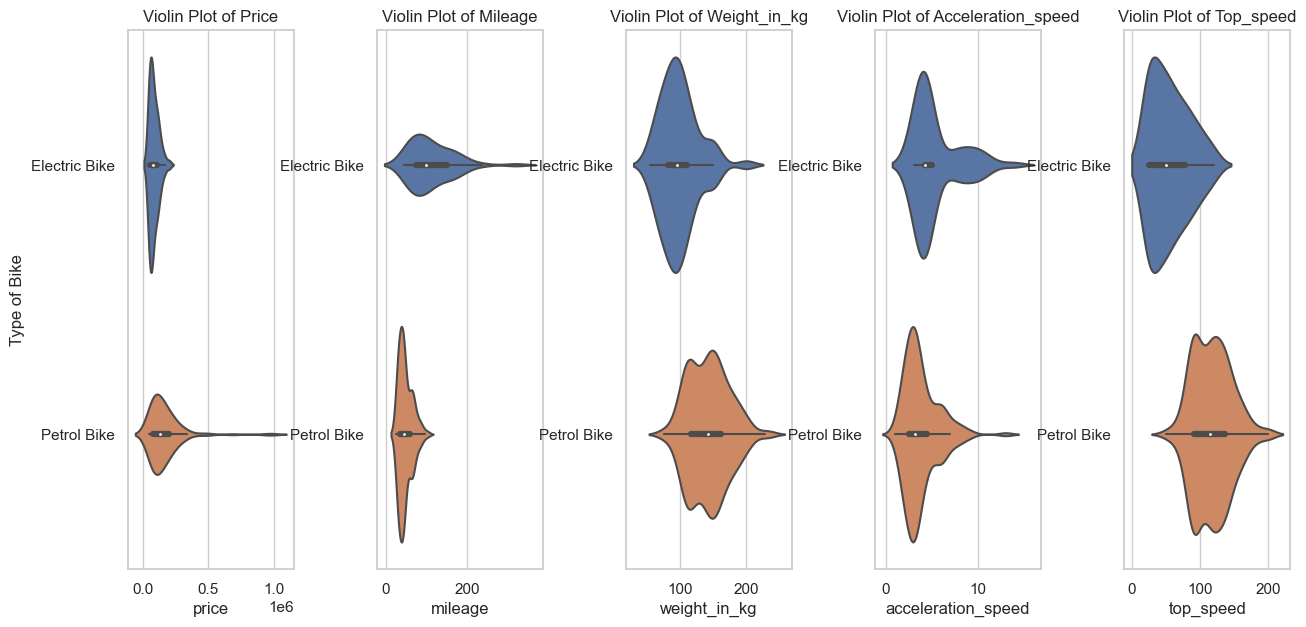

In [397]:
#  Plotting
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['price', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']:
    n += 1
    plt.subplot(1, 5, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='type_of_bike', data=df5_no_model)
    plt.ylabel("Type of Bike" if n == 1 else '')
    plt.title(f'Violin Plot of {cols.capitalize()}')

plt.show()

In [413]:
df6 = pd.read_csv("bike_buyers.csv")

In [414]:
df6.head()

ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
3  24381         Single     NaN  70000.0       0.0        Bachelors   
4  25597         Single    Male  30000.0       0.0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

In [415]:
# Remove rows with any missing values
df6 = df6.dropna()

In [416]:
# Convert categorical variables to numerical values using one-hot encoding
df6_encoded = pd.get_dummies(df6, drop_first=True)

In [417]:
# Calculate the correlation matrix
correlation_matrix = df6_encoded.corr()

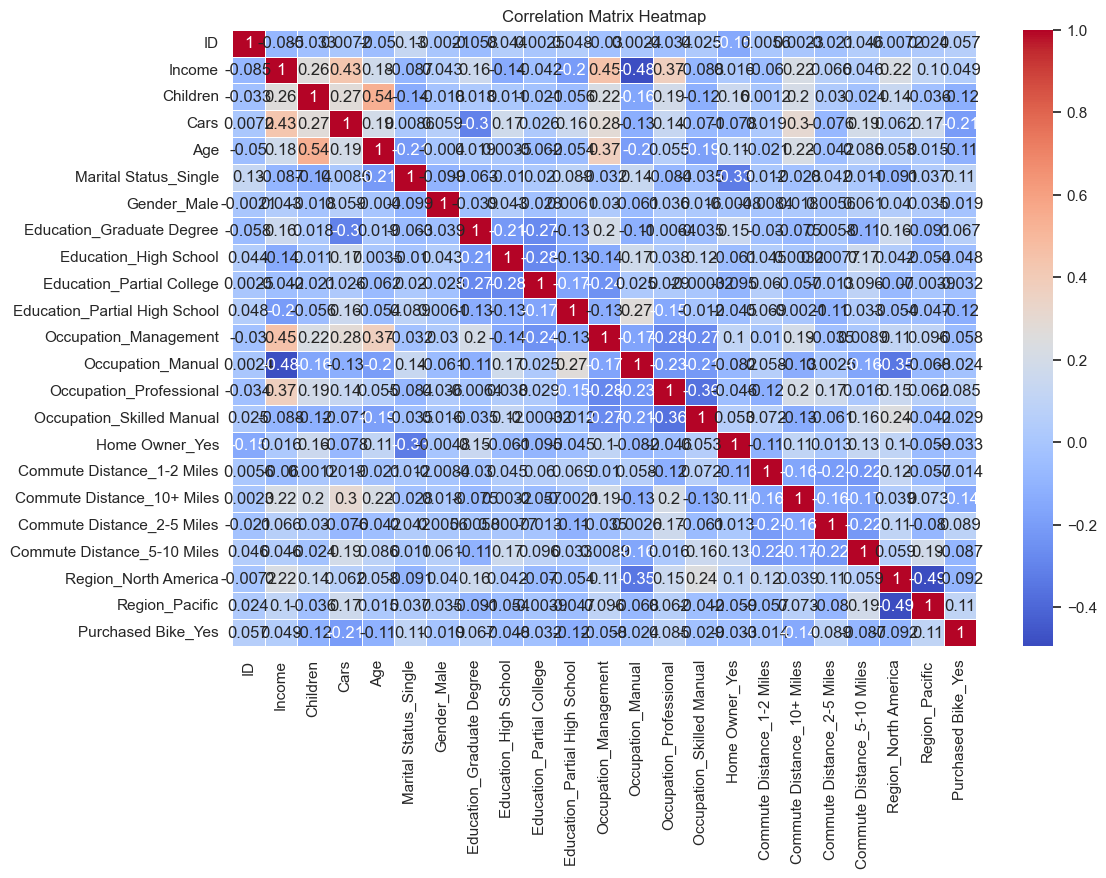

In [418]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [404]:
# Convert numeric columns to correct dtype
df6['Income'] = pd.to_numeric(df6['Income'])
df6['Cars'] = pd.to_numeric(df6['Cars'])
df6['Age'] = pd.to_numeric(df6['Age'])

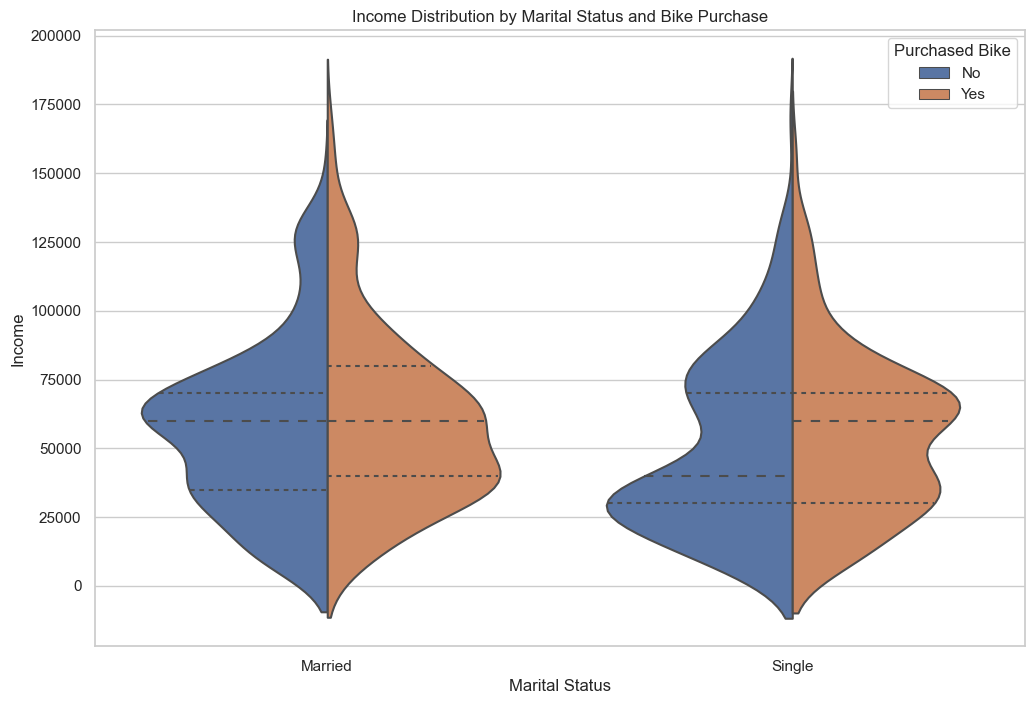

In [405]:
# Plot Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Marital Status', y='Income', data=df6, hue='Purchased Bike', split=True, inner='quart', linewidth=1.5)
plt.title('Income Distribution by Marital Status and Bike Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.legend(title='Purchased Bike', loc='best')
plt.show()

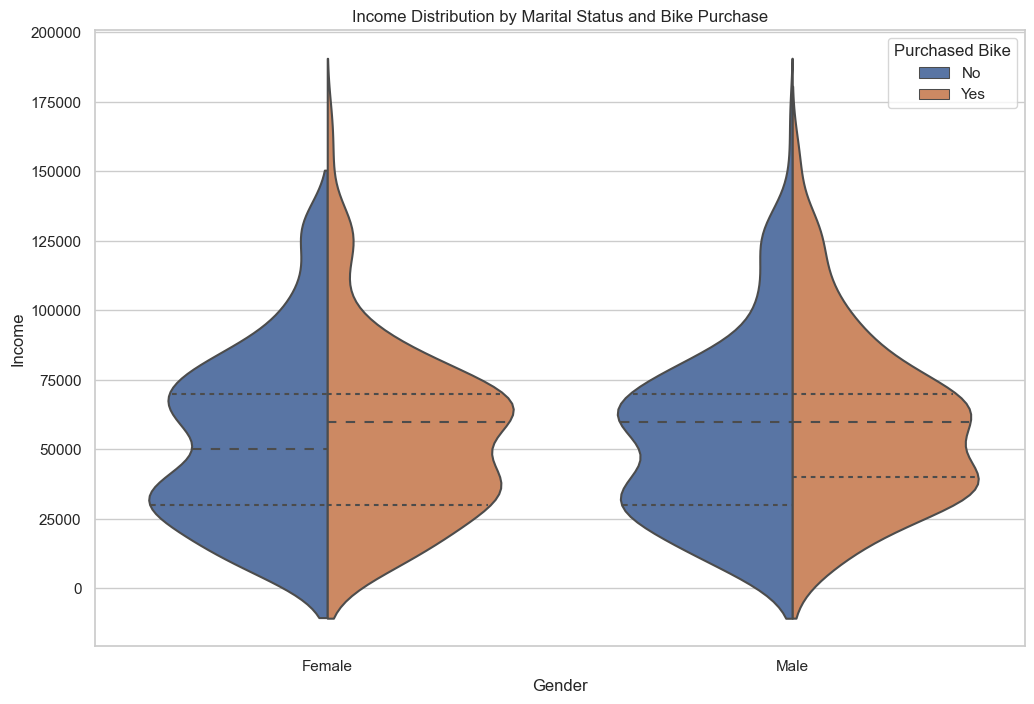

In [406]:
# Plot Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Income', data=df6, hue='Purchased Bike', split=True, inner='quart', linewidth=1.5)
plt.title('Income Distribution by Marital Status and Bike Purchase')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.legend(title='Purchased Bike', loc='best')
plt.show()

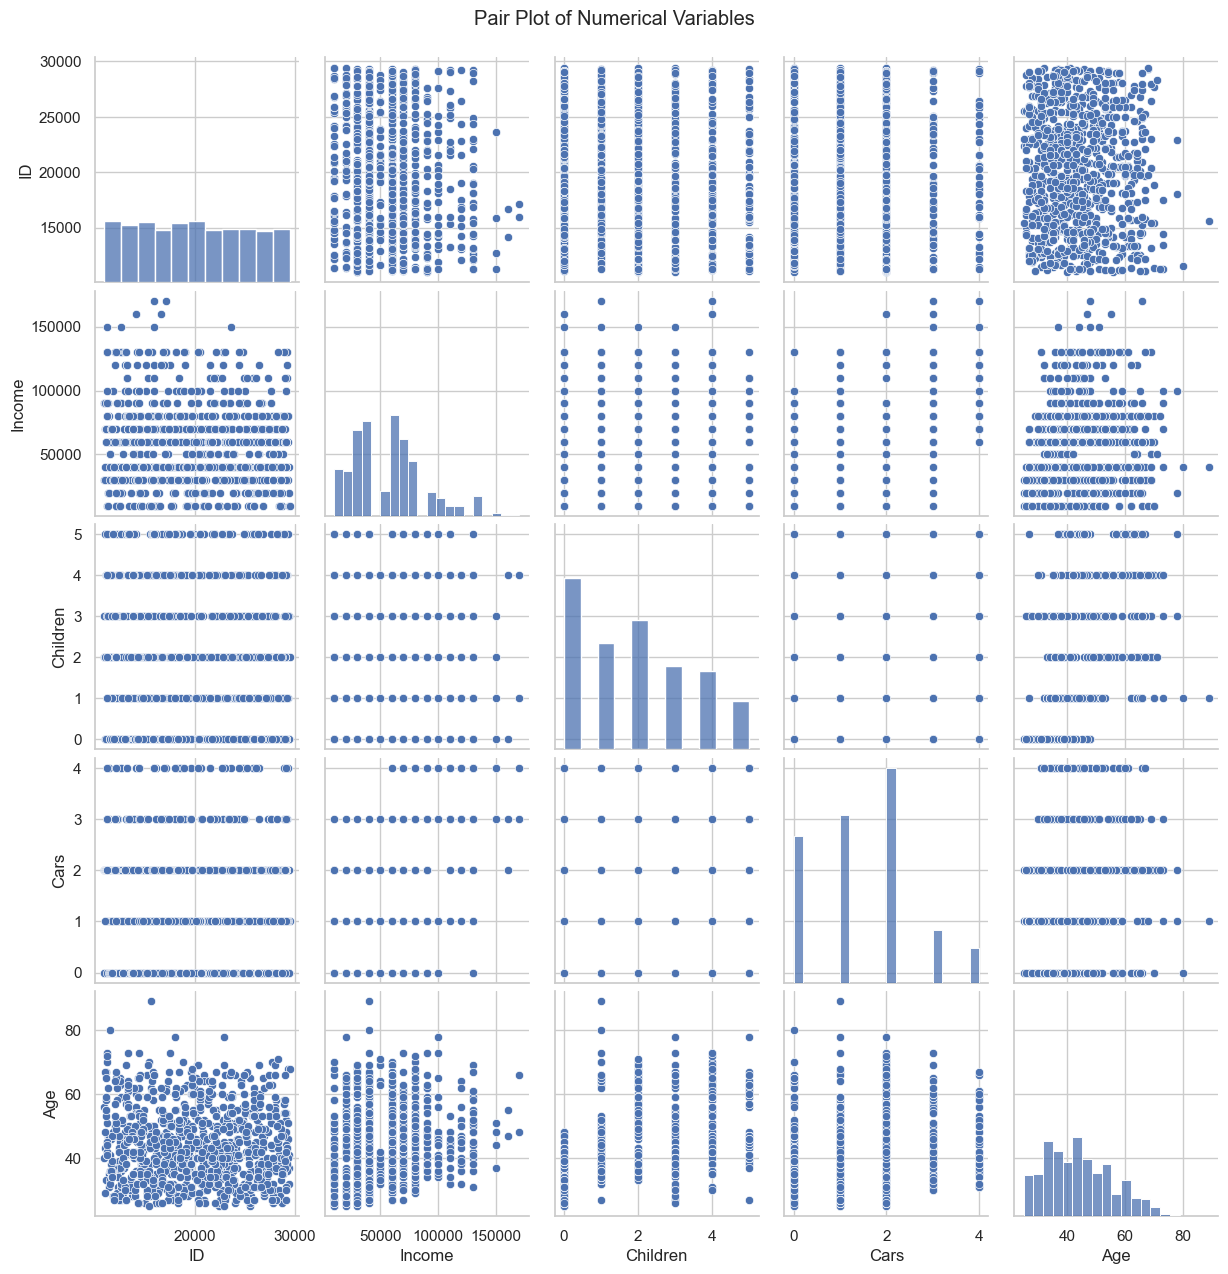

In [407]:
# Pair Plot
sns.pairplot(df6)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [408]:
# Filter for married men who bought a bike or not
married_men = df6[(df6['Marital Status'] == 'Married') & (df6['Gender'] == 'Male')]

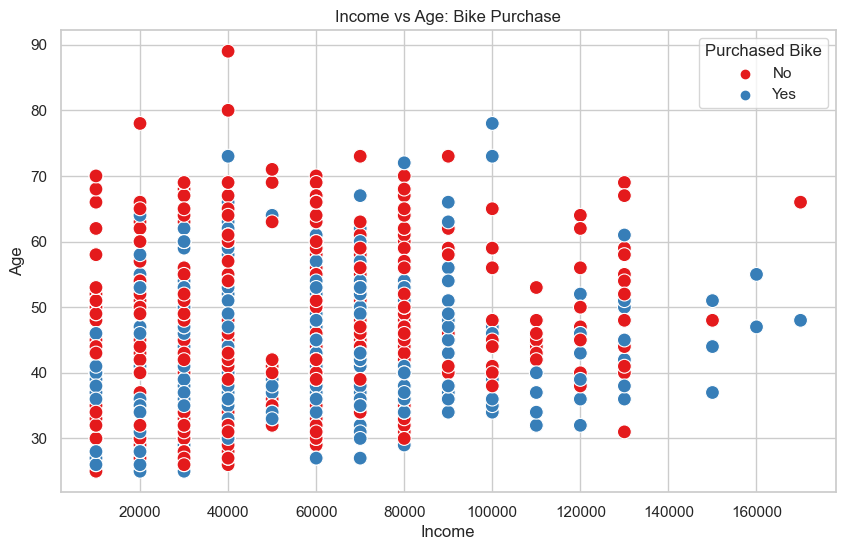

In [409]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Age', hue='Purchased Bike', data=df6, palette='Set1', s=100)
plt.title('Income vs Age: Bike Purchase')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()

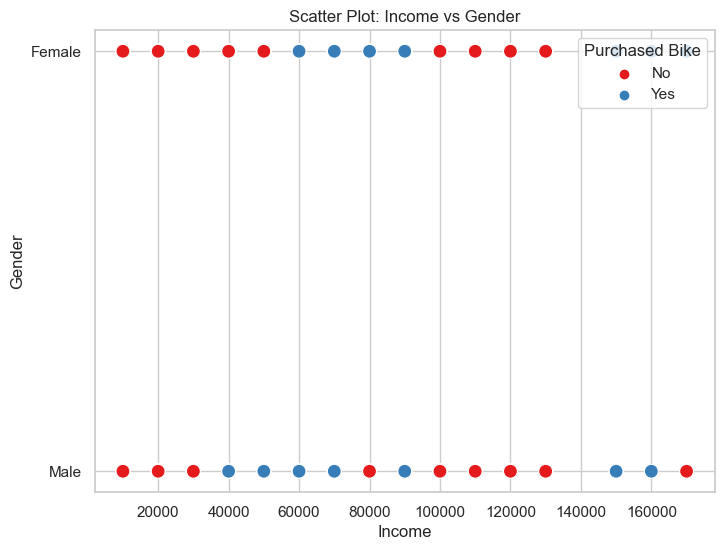

In [410]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Gender', hue='Purchased Bike', data=df6, palette='Set1', s=100)
plt.title('Scatter Plot: Income vs Gender')
plt.xlabel('Income')
plt.ylabel('Gender')
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()

In [412]:
# Calculate correlations
corr_matrix = df6.corr()

ValueError: could not convert string to float: 'Married'

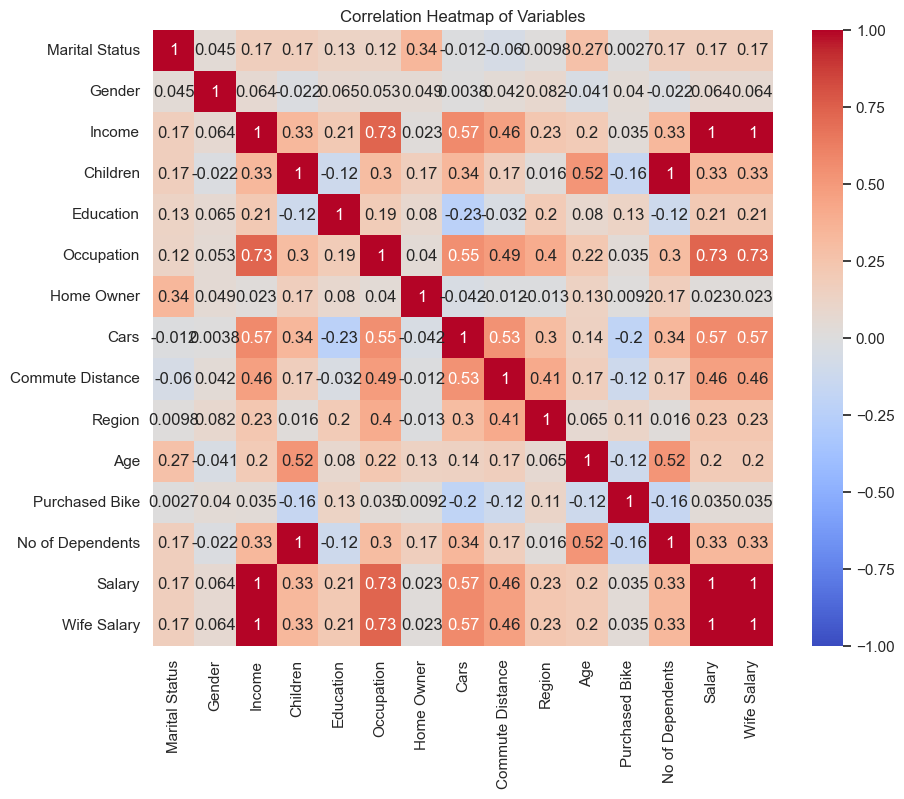

In [419]:
# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Variables')
plt.show()

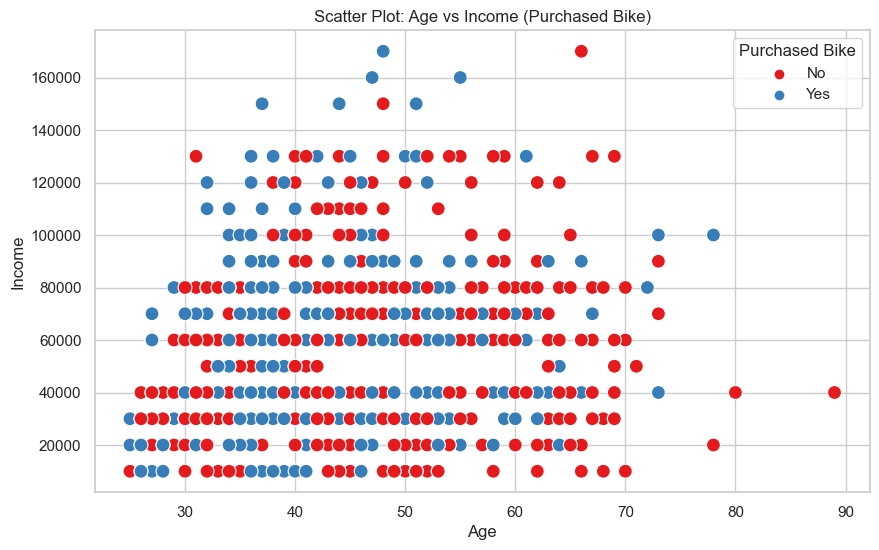

In [420]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Purchased Bike', data=df6, palette='Set1', s=100)
plt.title('Scatter Plot: Age vs Income (Purchased Bike)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Purchased Bike', loc='upper right')
plt.show()

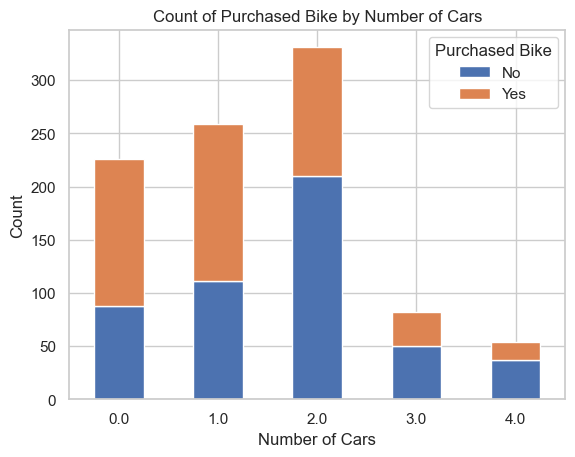

In [421]:
# Drop rows with missing values
df6 = df6.dropna()

# Count the occurrences of each combination
counts = df6.groupby(['Cars', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Number of Cars')
plt.xlabel('Number of Cars')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [422]:
# Clean the data: Remove rows where Gender is None or missing
df6 = df6.dropna(subset=['Gender'])

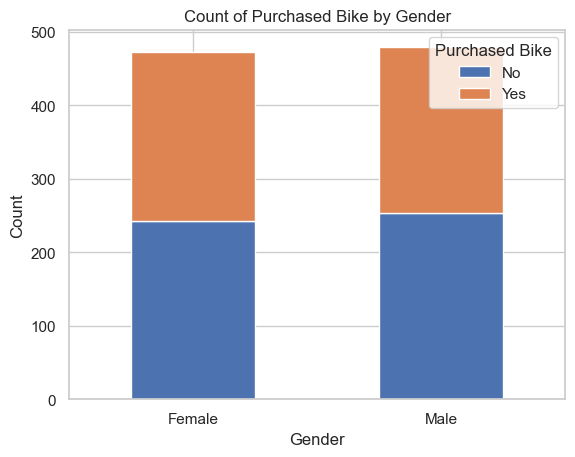

In [423]:
# Count the occurrences of each combination
counts = df6.groupby(['Gender', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

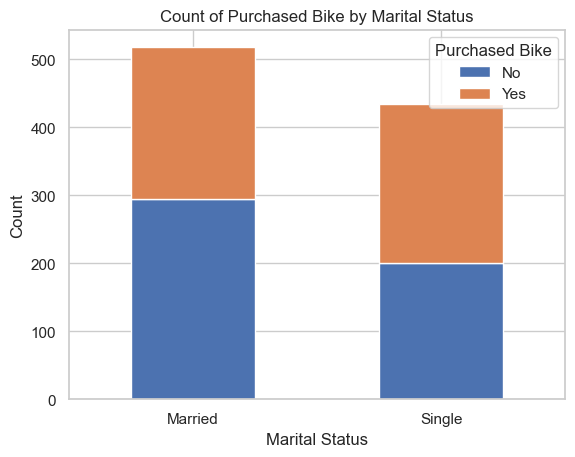

In [425]:
# Count the occurrences of each combination
counts = df6.groupby(['Marital Status', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

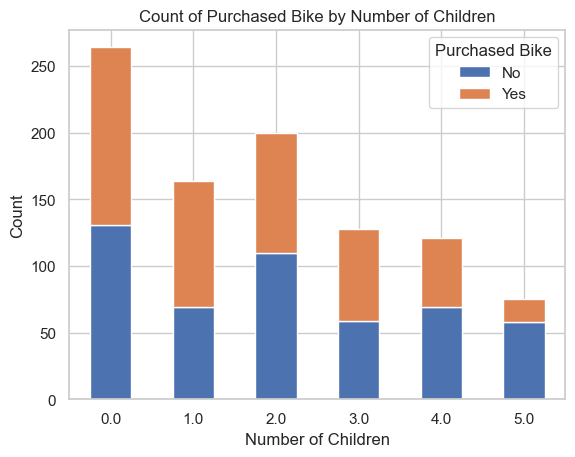

In [426]:
# Count the occurrences of each combination
counts = df6.groupby(['Children', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

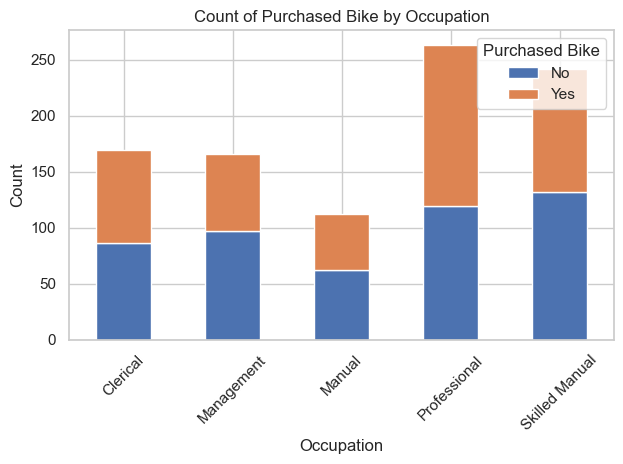

In [427]:
# Count the occurrences of each combination
counts = df6.groupby(['Occupation', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

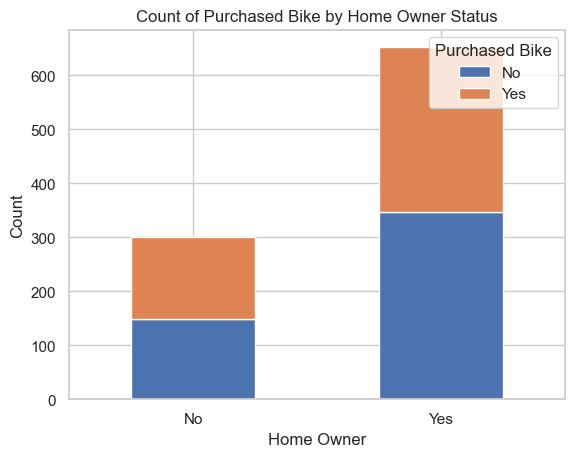

In [428]:
# Count the occurrences of each combination
counts = df6.groupby(['Home Owner', 'Purchased Bike']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchased Bike by Home Owner Status')
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.legend(title='Purchased Bike', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()